# PDA Data Science Project

## Predicting Employee Turnover with Machine Learning and Generating Visualizations

## 1. Introduction

* Group Project Number: Group1
* Team Members: Jaime Alexis GarciaGarcia, Jamie Renwick, Safoora Kappukkuth Pottammal


## 2. Data collection

## 3. Data Description

### Libraries

In [1]:
# installing libraries
# pip install matplotlib

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset file

In [3]:
df = pd.read_csv('Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


## 4. Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


### Null Values Analysis

In [5]:
df.isna().sum().sort_values(ascending = False)

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

### EDA Categoric Variables

In [6]:
def categoric_eda_graphs(cat):

    # rows needed
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    # Graph design
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    # flat graph
    ax = ax.flat

    # adding graphs for each variable
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)

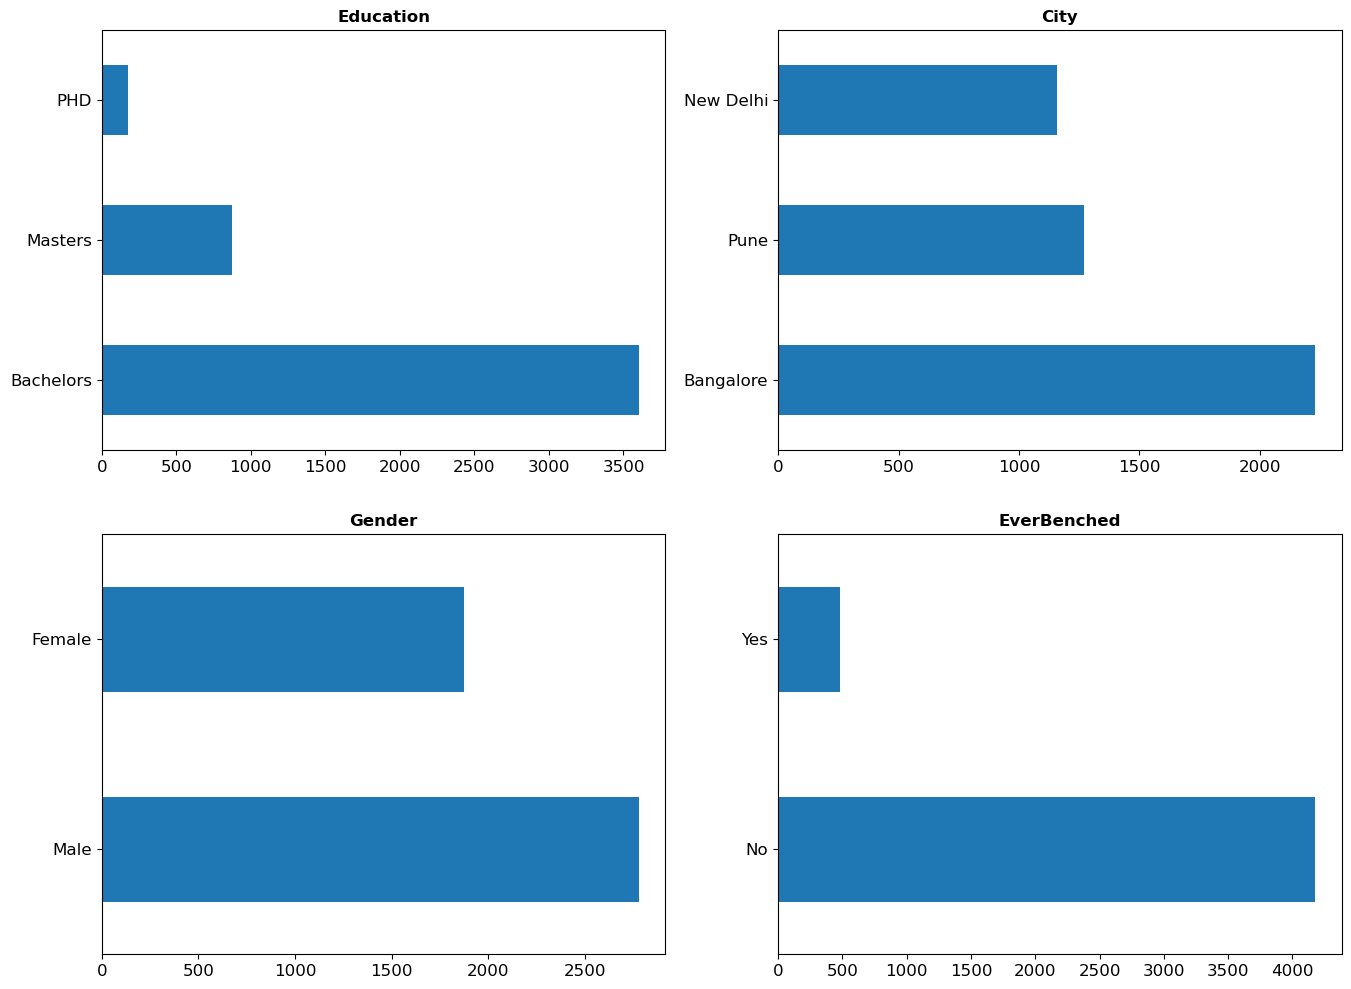

In [7]:
categoric_eda_graphs(df.select_dtypes('O'))

In [8]:
def estadistics_cont(num):
    # describe
    estadistics = num.describe().T
    # Adding median
    estadistics['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadistics = estadistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadistics)

In [9]:
estadistics_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
JoiningYear,4653.0,2015.062970,2015.0,1.863377,2012.0,2013.0,2015.0,2017.0,2018.0
PaymentTier,4653.0,2.698259,3.0,0.561435,1.0,3.0,3.0,3.0,3.0
Age,4653.0,29.393295,28.0,4.826087,22.0,26.0,28.0,32.0,41.0
ExperienceInCurrentDomain,4653.0,2.905652,3.0,1.558240,0.0,2.0,3.0,4.0,7.0
LeaveOrNot,4653.0,0.343864,0.0,0.475047,0.0,0.0,0.0,1.0,1.0


## 6. Model Selection